# <u> Notebook </u> [_Hypothesis-1(b)_]

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

In [3]:
# reading the data
income_data = pd.read_csv("data/cleaned_income_data.csv")  

# check for the first few values in the data.
income_data.head()

,year,household_type,up_to_10%,10-20%,20-30%,30-40%,40-50%,over_50%,total,population_total,poverty_risk_population,non_poverty_risk_population
0,2020,Households without children,13.194,14.586,9.466,4.365,1.899,2.875,48.183,21.5,42.0,17.6
1,2020,Persons living alone,3.052,3.454,3.876,2.397,1.183,1.802,16.468,29.8,46.7,23.1
2,2020,Two adults without children,7.365,9.335,4.850,1.706,0.623,0.868,25.660,18.7,38.0,16.1
3,2020,Three or more adults without children,2.777,1.797,0.740,0.262,1.001,0.206,6.054,21.5,42.0,17.6
4,2020,Households with children,10.178,10.511,7.573,2.444,1.001,1.407,33.972,21.5,42.0,17.6


In [4]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         45 non-null     int64  
 1   household_type               45 non-null     object 
 2   up_to_10%                    45 non-null     float64
 3   10-20%                       45 non-null     float64
 4   20-30%                       45 non-null     float64
 5   30-40%                       45 non-null     float64
 6   40-50%                       45 non-null     float64
 7   over_50%                     45 non-null     float64
 8   total                        45 non-null     float64
 9   population_total             45 non-null     float64
 10  poverty_risk_population      45 non-null     float64
 11  non_poverty_risk_population  45 non-null     float64
dtypes: float64(10), int64(1), object(1)
memory usage: 4.3+ KB


### <u>Hypothesis 1(b)</u> :
**Housing cost burden is rising across all income levels**. <br> *This means we want to check whether more people are gradually moving into higher burden categories (e.g., spending over 30%, 40%, or 50% of their income on housing)*.

- Track shifts from lower brackets (up to 20%) to higher ones (over 30%, over 50%) for total population or certain households.
- See if people are moving into higher burden brackets over the years.
- Data to Use:
    - Over 30–40%, Over 40–50%, Over 50% brackets
    - Trend lines over time


In [5]:
# Selecting the relevant columns 
burden_cols = ['30-40%', '40-50%', 'over_50%']

# Group by year and computing the mean for each bracket
trend_data = income_data.groupby('year')[burden_cols].mean().round(2).reset_index()

# [burden_cols].mean() --> For each year, it calculates the average percentage 
# of the population in each housing cost burden bracket.
print(trend_data)  

   year  30-40%  40-50%  over_50%
0  2020    2.50    1.17      1.55
1  2021    2.97    1.39      1.67
2  2022    3.31    1.44      1.85
3  2023    3.38    1.54      2.05
4  2024    3.13    1.49      1.82


- This is important to check because we want to look whether more people fall into the higher burden categories over time or not.
- In the ```trend_data``` we can see the average burden in burden-brackets for each year.

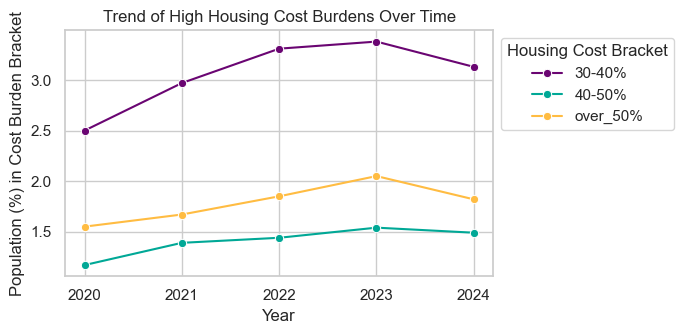

In [6]:
# Set the style
sns.set(style="whitegrid")

# Melt the dataframe to long format for easier plotting
trend_data_melted = trend_data.melt(id_vars='year', var_name='burden_bracket', value_name='percentage')

# defining custom colors
custom_colors = [
    '#6A0572',  # plum purple
    '#00A896',  # teal
    '#FFBC42'   # soft yellow-orange
]


# Plot
plt.figure(figsize=(7, 3.5))
sns.lineplot(data=trend_data_melted, x='year', y='percentage', hue='burden_bracket', 
             marker='o', palette=custom_colors)
plt.title("Trend of High Housing Cost Burdens Over Time")
plt.xlabel("Year")
plt.ylabel("Population (%) in Cost Burden Bracket")
plt.legend(title="Housing Cost Bracket", bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(ticks=range(2020, 2025), labels=[str(y) for y in range(2020, 2025)])
plt.tight_layout()
plt.show()

- We have used ```.melt()``` method to reshape the data from the wide format to long format. 
- We have the data in ```.melt()``` in wide format, and we reshape it into long format such as : ```year```(all years), ```burden_brackets```(chosen columns in our case), ```percentage```(% of people lying in the burden brackets).
- We can now plot multiple lines on one plot, one per burden bracket.

#### <u>Conclusion</u> :
- General trend for all the brackets is increasing for years 2020 to 2023. <br> This supports our hypothesis and reflects that more people are facing housing cost burdens over time.
- There is a drop for the year 2024. This could be due to data anomaly or reporting delay. <br> This does not negate the general trend of the cost burdens (which is rising with time).
- Bracket-by-Bracket observation :
    - 30-40% , highest percentage of cost burden throughout the years
    - 40-50% and over 50%, though smaller in magnitude, both show consistent year-on-year increases until 2023. 
    - This suggests more households are being pushed from moderate to severe cost burden zones.

- <u>_Overall Suggestion :_</u>
    - Hypothesis is Largely supported
    - These trends suggest that more households are spending larger shares of their net income on housing over time.
    - some flattening or slight decline in 2024, which could be investigated further (policy effect? inflation relief? lag in data?)
    - The increasing trend in over_50% bracket is especially notable — showing more households are at the highest stress level.
    - This indicates that housing affordability is worsening for a growing portion of the population: more people are allocating a higher fraction of their income to housing.
    - Though there's a slight decline across all brackets in 2024, the overall trend remains upward, supporting the hypothesis that housing cost burden is rising across income levels.

- <u>_Final say :_</u> <br> From 2020 to 2023, the share of households spending more than 30% of their net income on housing has increased across all high-burden brackets. This shift into higher cost burdens highlights increasing pressure on household finances and supports the hypothesis that housing cost burden is on the rise across income groups.


In [7]:
# Using a stacked area-chart to see this clearly...
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Select your burden columns
burden_cols = ['up_to_10%', '10-20%', '20-30%', '30-40%', '40-50%', 'over_50%']

# Step 2: Average across population for each year
stacked_data = income_data.groupby('year')[burden_cols].mean().reset_index()

# Step 3: Melt to long format
stacked_melted = stacked_data.melt(id_vars='year', var_name='burden_bracket', value_name='percentage')

# Step 4: Sort brackets so they stack in order
burden_order = ['up_to_10%', '10-20%', '20-30%', '30-40%', '40-50%', 'over_50%']
stacked_melted['burden_bracket'] = pd.Categorical(stacked_melted['burden_bracket'], 
                                                  categories=burden_order, ordered=True)

# Step 5: Pivot to wide format for stack-plot
pivot_data = stacked_melted.pivot(index='year', columns='burden_bracket', values='percentage')
pivot_data = pivot_data[burden_order]  # ensure column order

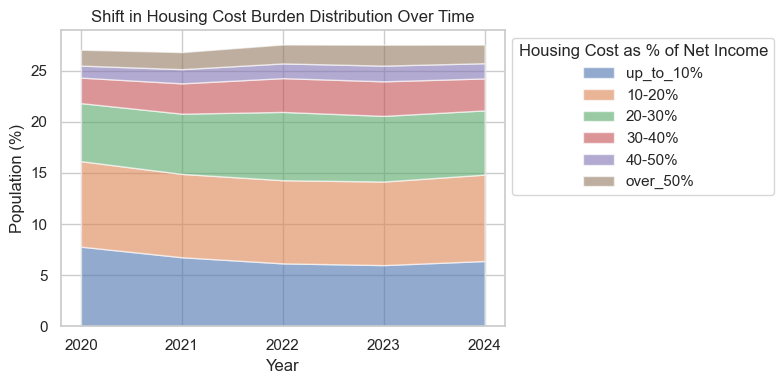

In [8]:
# Step 6: Plot
plt.figure(figsize=(8, 4))
plt.stackplot(pivot_data.index, pivot_data.T, labels=burden_order, alpha=0.6)
plt.legend(title="Housing Cost as % of Net Income", loc='upper left')
plt.title("Shift in Housing Cost Burden Distribution Over Time")
plt.xlabel("Year")
plt.ylabel("Population (%)")
plt.legend(
    title="Housing Cost as % of Net Income",
    bbox_to_anchor=(1, 1),
    loc='upper left'
)
plt.xticks(ticks=range(2020, 2025), labels=[str(y) for y in range(2020, 2025)])
plt.tight_layout()
plt.show()

#### <u>Explanation</u>: 
- _What It Represents :_
    - Each colored band represents a bracket of people who spend a certain percentage of their net income on housing. <br> E.g., the green band labeled '20-30%' = people spending 20–30% of income on housing.
    - The height of each band shows how large the group is, in percentage of total population.
    - The stacking shows how these groups sum up to the total.

- _Our Conclusion :_
    - Lower brackets (up_to_10%, 10–20%) are shrinking slightly, especially between 2020 and 2022. <br> This suggests fewer people are spending a small share of their income on housing → possibly due to rising costs.
    - Mid brackets (20–30%, 30–40%) are relatively stable, but gaining slightly in some years.
    - Higher brackets (40–50%, over_50%) are increasing slightly, especially over_50% → this is crucial!
    - More people are spending a very high share of income on housing → strong evidence supporting your hypothesis.

- _"The stack area chart clearly shows a shift from low burden brackets toward higher ones over time."_

### <u>Viewing the trend by household type</u> : 
We want to generate stacked area plots, one for each household type, showing how the housing cost burden (as % of net income) distribution changes from 2020–2024.

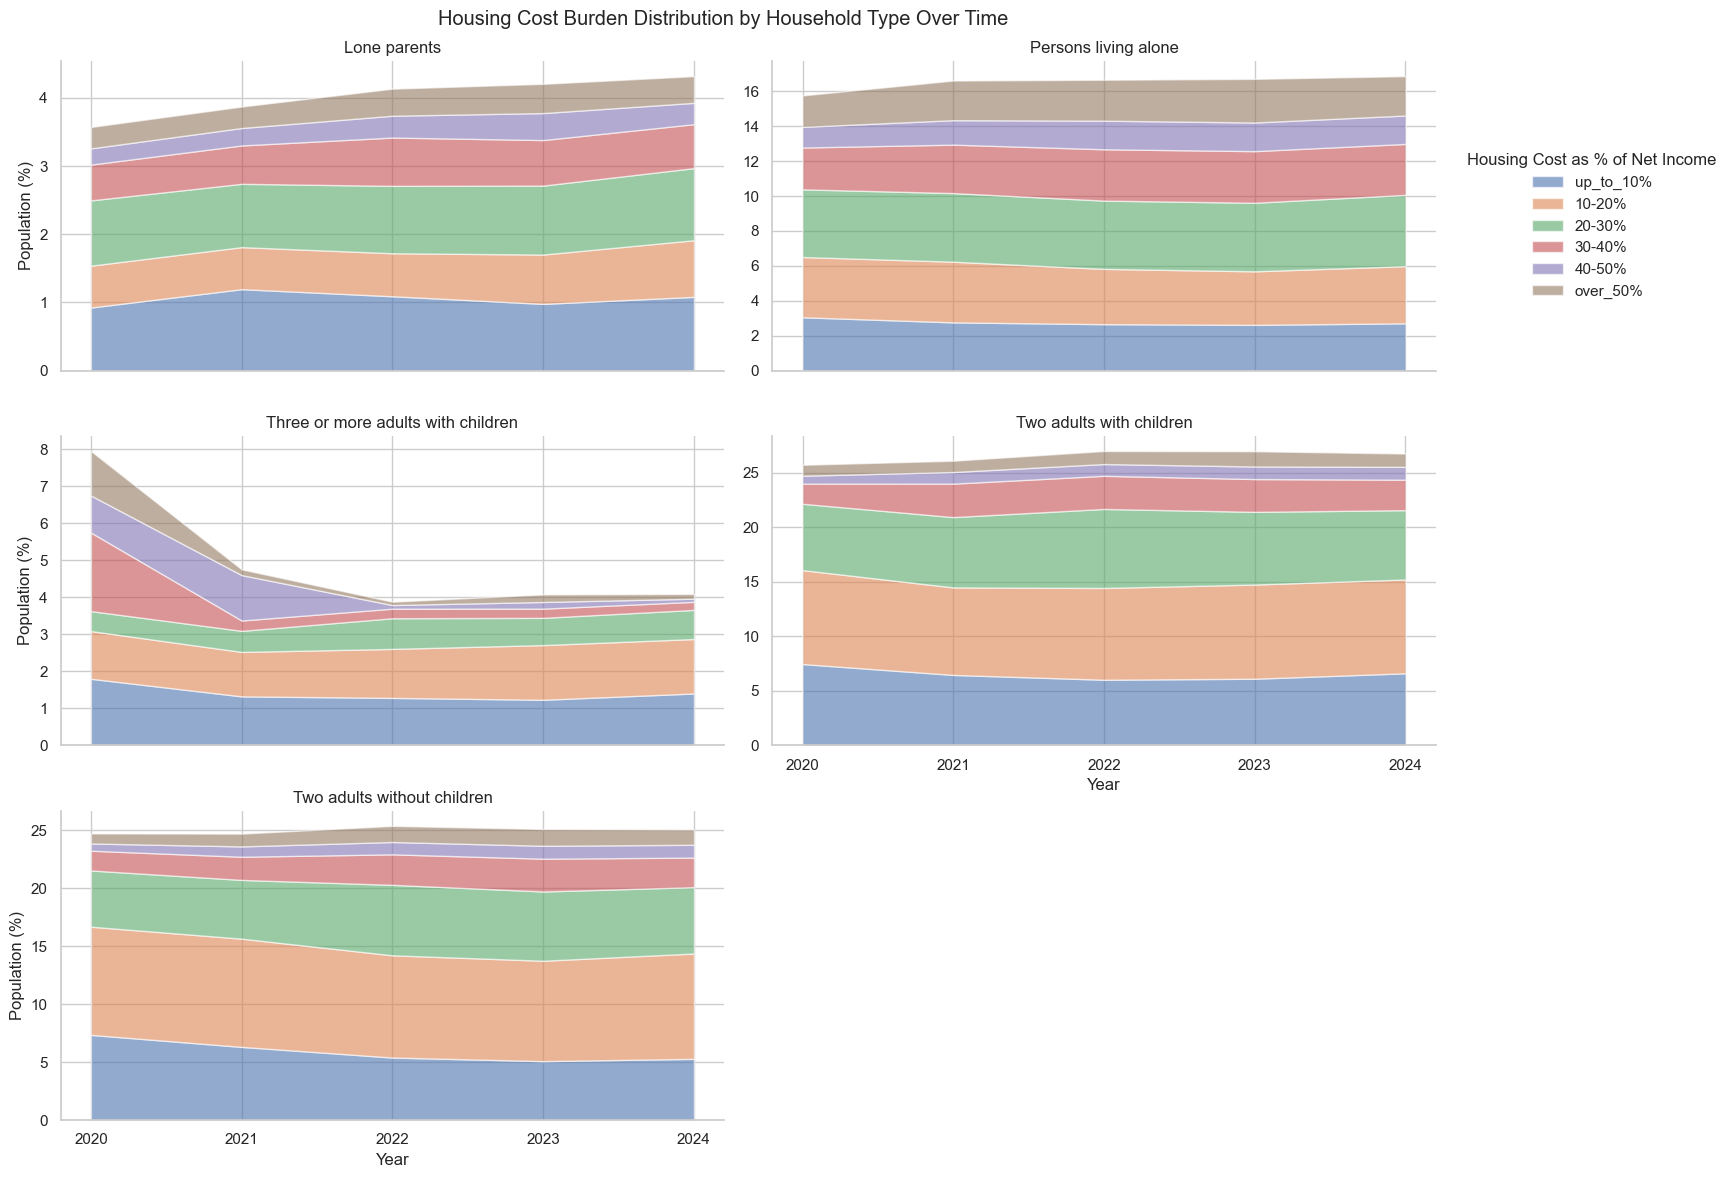

In [9]:
# the necessary libraries are already imported in the first cell

# Filter only relevant household types
relevant_types = ['Persons living alone', 'Lone parents',
                  'Two adults without children', 'Two adults with children',
                  'Three or more adults with children'] 
subset_data = income_data[income_data['household_type'].isin(relevant_types)]
#print(f"subset_data  ::  \n{subset_data}")


# Step 1: Melt the burden columns into long format
burden_cols = ['up_to_10%', '10-20%', '20-30%', '30-40%', '40-50%', 'over_50%']
melted = subset_data.melt(
         id_vars=['year', 'household_type'],
         value_vars=burden_cols,
         var_name='burden_bracket',
         value_name='percentage'
)


# Step 2: Ensure burden_bracket is ordered correctly
burden_order = ['up_to_10%', '10-20%', '20-30%', '30-40%', '40-50%', 'over_50%']
melted['burden_bracket'] = pd.Categorical(
                                        melted['burden_bracket'], categories=burden_order, ordered=True
                                         )    


# Step 3: Pivot for each household type (plotting-ready format)
# aggregating the data so that for each household type, in each year,
# for each burden bracket, we calculate the average percentage of people in that bracket.
pivot_by_household = (
                        melted.groupby(['household_type', 'year', 'burden_bracket'])['percentage']
                        .mean()
                        .reset_index()
                    )


# Remove any household types starting with "Total_"
pivot_by_household = pivot_by_household[~pivot_by_household['household_type'].str.startswith('Total_')]


# Step 4: Set up the facet grid
# to create subplots for each category (household-type)
# creating stacked area plots (or layered lines/bars) for each household type.
g = sns.FacetGrid(
    pivot_by_household,
    col="household_type",
    col_wrap=2,
    height=4,
    aspect=1.5,
    sharey=False  # <-- This enables dynamic y-axis scaling per subplot
)


# Step 5: Plot stacked areas per household type
'''def plot_stacked_area(data, **kwargs):
    pivot = data.pivot(index='year', columns='burden_bracket', values='percentage')
    pivot = pivot[burden_order]  # ensure column order

    plt.stackplot(
        pivot.index,
        pivot.T.values,
        labels=burden_order,
        alpha=0.9
    )'''

def plot_stacked_area(data, color=None, **kwargs):
    pivot = data.pivot(index='year', columns='burden_bracket', values='percentage')
    pivot = pivot[burden_order]  # ensure column order

    # Use consistent color palette
    #colors = sns.color_palette("Spectral", n_colors=len(burden_order))

    # Create the stackplot
    plots = plt.stackplot(
        pivot.index,
        pivot.T.values,
        labels=burden_order,
        #colors=colors,
        alpha=0.6
    )

    # Only add legend to the first subplot to avoid repetition
    if plt.gca().get_subplotspec().is_first_col():
        plt.legend(loc='upper left', bbox_to_anchor=(1.01, 0.8))
    
g.map_dataframe(plot_stacked_area)

# Clean up x-axis ticks for each subplot
for ax in g.axes.flat:
    ax.set_xticks(range(2020, 2025))
    ax.set_xticklabels([str(year) for year in range(2020, 2025)])

    
# Step 6: Add legends and labels
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Population (%)")
g.add_legend(title="Housing Cost as % of Net Income", bbox_to_anchor=(1,0.8), loc="center left")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Housing Cost Burden Distribution by Household Type Over Time")
plt.tight_layout()
plt.show()

#### <u>Explanation</u>:
- Key Observations by Household Type
    - Households with children and Two adults with children:
    - Most households fall into lower burden brackets (up_to_10%, 10-20%, and 20-30%).
    - These groups show relatively stable patterns over time, with slight fluctuations but no dramatic changes.
    - Suggests relatively stable housing affordability.

- Households without children and Two adults without children:
    - Similar to above — mostly lower to mid-range burden brackets.
    - Slight upward trend in higher burden brackets for some years.

- Persons living alone:
    - This group has a wider spread across burden brackets, including noticeable portions in higher brackets (30-40%, 40-50%, and over_50%).
    - Reflects that single-person households may experience more financial stress related to housing costs.

- Lone parents and Three or more adults with/without children:

    - These plots are flat or near-zero in the chart, likely due to:
        - Very small sample sizes Or data issues (e.g., near-zero values not rendering well)
    - This suggests caution when interpreting these subplots — possibly incomplete or non-representative data.

#### <u>_Conclusion</u> :_
- Most household types are concentrated in the lower burden brackets, meaning a large portion of households spend 10–30% of their income on housing — traditionally considered affordable.
- ⚠️ Persons living alone and possibly lone parents (if data were better represented) may be at higher risk of housing cost burden, as shown by higher representation in over_30% brackets.
- _Temporal trend (2020–2024)_: Overall, the distribution appears remarkably stable year over year — no sharp upward movement into higher burden brackets. This could imply that housing affordability hasn't worsened drastically in this period — at least not across all household types.

🔹 _For most household types_ : No significant rising temporal trend is visible.

🔹 _For single-person households_ : There may be a slight upward trend in high burden brackets.